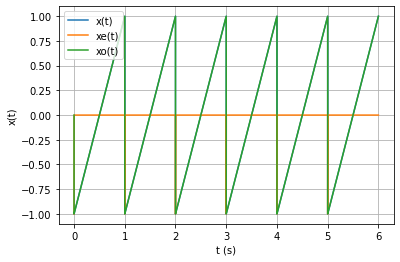

In [53]:
import numpy as np
import matplotlib. pyplot as plt
from scipy import signal
    
#Task 1a)

#t
start = 0
stop = 6
increment = 0.0001
t = np.arange(start,stop,increment)

#Constants
pi = np.pi

#functions
sawWavePos = signal.sawtooth(2 * np.pi * t)
sawWaveNeg = signal.sawtooth(2 * np.pi * -t)

even = (sawWavePos + sawWaveNeg)/2
odd = (sawWavePos - sawWaveNeg)/2

#Plot
fig, ax = plt.subplots()
ax.plot(t, sawWave,label="x(t)")
ax.plot(t, even,label="xe(t)")
ax.plot(t, odd,label="xo(t)")

ax.set_xlabel("t (s)")
ax.set_ylabel("x(t)")

ax.legend()
ax.grid()

#fig.savefig('figure_task_1')


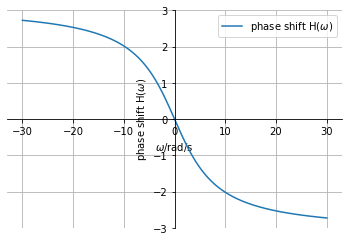

In [2]:
import numpy as np
import matplotlib. pyplot as plt
from scipy import signal

#w
start = -30
stop = 30
increment = 0.0001
w = np.arange(start,stop,increment)

#Constants
pi = np.pi
alpha = 2*pi

#Magnitude:
Xw = np.abs((alpha**2)/((alpha + 1j*w)**2)) 

#Phase shift
hw = -2*np.arctan(w/alpha)

#Plot
fig,ax = plt.subplots()


### MAGNITUDE
#ax.plot(w,hw,label="|H($\omega$)|")
#ax.set_xlabel('$\omega$/rad/s')
#ax.set_ylabel('|H($\omega$)|')


ax.plot(w,hw,label="phase shift H($\omega$)")

ax.set_xlabel('$\omega$/rad/s')
ax.set_ylabel('phase shift H($\omega$)')

ax.legend()
ax.grid()

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

fig.savefig('figure_task_2a_2')

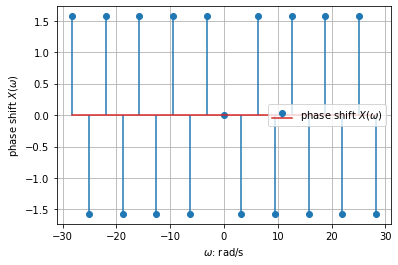

In [155]:
import numpy as np
import matplotlib. pyplot as plt
from scipy import signal


#Constants
pi = np.pi
alpha = 2*pi

w0 = pi
j = 1j

#w
start = -9*pi
stop = 10*pi
increment = pi
t = np.arange(start, stop, increment)

def dirac(w):
    if np.abs(w) < 0.000001:
        return 1

    return 0

def c(n):
    if n == 0:
        return 0 

    return ((-1)**n*1j) / (n * np.pi)


def X(w, w0, i):
    value = 0
    for n in range(-i, i+1):
        value = value + c(n) * dirac(w - n * w0)
        
    return value * 2 * np.pi


mag_Xw = [np.abs(X(a , w0 , 10)) for a in t]
phase_Xw = [np.angle(X(a , w0, 10)) for a in t]

#Plot
fig, ax = plt.subplots()
plt.stem(time, phase_Xw, linefmt='-', label='phase shift $X(\omega)$')
ax.legend()


ax.set_ylabel('phase shift $X(\omega)$')
ax.set_xlabel('$\omega$: rad/s')
ax.grid()
plt.show()


fig.savefig('figure_task_2b_phase')

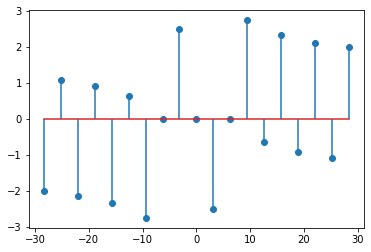

In [236]:
import numpy as np
import matplotlib. pyplot as plt
from scipy import signal

#Constants
pi = np.pi
alpha = 2*pi
w0 = pi
j = 1j
count = 10


#w
start = -9*pi
stop = 10*pi
increment = pi
time = np.arange(start, stop, increment)

h = ((4*(pi)**2)/((2*pi+j*time)**2)) 
h_phase = np.angle(h)
h_abs = np.abs(h)

def dirac(w):
    if np.abs(w) < 0.000001:
        return 1
    
    return 0
    
def c(n):
    if n == 0:
        return 0 
    
    return ((-1)**n*j) / (n * np.pi)

def X(w, w0, N):
    sum = 0
    
    for n in range(-N, N+1):
        value = c(n) * dirac(w - n * w0)
        sum += value
        
    return sum * 2 * np.pi


y_abs = [np.abs(X(t,w0,count)) for t in time]



Yw = y_abs * h_abs * np.exp(j*(h_phase + y_phase))
Xw = np.abs((alpha**2)/((alpha + 1j*w)**2)) 
#Yw_abs = h_abs * y_abs
Yw_abs = np.abs(Yw)


#Yw_phase = y_phase + h_phase

Yw_phase = np.angle(Yw)
phase_Xw = [np.angle(X(t,w0,count)) for t in time]

#Phase shift
#hw = -2np.arctan(w/alpha)

#Plot

plt.stem(time, Yw_phase, label = 'phase shift $X(\omega)$')
ax.legend()


ax.set_ylabel('phase shift $X(\omega)$')
ax.set_xlabel('$\omega$: rad/s')
ax.grid()
plt.show()

fig.savefig('figure_task_2b_phase')

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

pi = np.pi
omega = pi
dt = 0.001
alpha = 2*pi
t = np.arange(0,6,0.0001)

#w
start = -9*pi
stop = 10*pi
increment = pi
w = np.arange(start, stop, increment)


############ X(W)
def dirac(w):
    if np.abs(w) < 0.000001:
        return 1

    return 0

def c(n):
    if n == 0:
        return 0 

    return ((-1)**n*1j) / (n * np.pi)


def X(w, w0, i):
    value = 0
    for n in range(-i, i+1):
        value = value + c(n) * dirac(w - n * w0)
        
    return value * 2 * np.pi




def Y(n, w0):
    mag_Hw = np.abs((alpha**2)/((alpha + 1j*w)**2)) 
    mag_Xw = [np.abs(X(t , w , 10)) for t in w]
    mag_Yw = mag_Hw*mag_Xw
    print(mag_Xw)
    print(mag_Hw)
    
    phase_Hw = -2*np.arctan(w0/alpha)
    phase_Xw = [np.angle(X(t , w0, 10)) for t in w]
    phase_Yw = phase_Xw + phase_Hw
    
    Yw = mag_Yw*np.exp(1j*n*w0*t)
    
    return Yw

def y(N): 
    y = 0   
    for n in range(-N, N+1):
        y = y + (1/(2*pi))*Y(n, pi)     
        
    return y


y1 = y(1)
y2 = y(2)
y10 = y(10)
y20 = y(20)


# Create a new figure
fig, ax = plt.subplots()

#plot
ax.plot(t, y1, label='y1(t)')
ax.plot(t, y2, label='y2(t)')
ax.plot(t, y3, label='y3(t)')
ax.plot(t, y4, label='y4(t)')

ax.set_xlabel('t (s)')
ax.set_ylabel('y(t)')
ax.legend()

ax.grid()

ax.set_xlim(0,6)

fig.savefig('figure_task_3b')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()